## Projeto de Regressão

Aluna: Júlia Ferreira de Paiva

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Análise exploratória e feature engineering

In [50]:
data = pd.read_csv('data/ames.csv')

df = data.copy()
df.head()


,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS.SubClass      2930 non-null   int64  
 3   MS.Zoning        2930 non-null   object 
 4   Lot.Frontage     2440 non-null   float64
 5   Lot.Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot.Shape        2930 non-null   object 
 9   Land.Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot.Config       2930 non-null   object 
 12  Land.Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition.1      2930 non-null   object 
 15  Condition.2      2930 non-null   object 
 16  Bldg.Type        2930 non-null   object 
 17  House.Style   

In [52]:
#Agrupando todas as features em grupos

ignore_variables = [
    'Order',
    'PID',
]

continuous_variables = [
    'Lot.Frontage',
    'Lot.Area',
    'Mas.Vnr.Area',
    'BsmtFin.SF.1',
    'BsmtFin.SF.2',
    'Bsmt.Unf.SF',
    'Total.Bsmt.SF',
    'X1st.Flr.SF',
    'X2nd.Flr.SF',
    'Low.Qual.Fin.SF',
    'Gr.Liv.Area',
    'Garage.Area',
    'Wood.Deck.SF',
    'Open.Porch.SF',
    'Enclosed.Porch',
    'X3Ssn.Porch',
    'Screen.Porch',
    'Pool.Area',
    'Misc.Val',
    'SalePrice',
]

discrete_variables = [
    'Year.Built',
    'Year.Remod.Add',
    'Bsmt.Full.Bath',
    'Bsmt.Half.Bath',
    'Full.Bath',
    'Half.Bath',
    'Bedroom.AbvGr',
    'Kitchen.AbvGr',
    'TotRms.AbvGrd',
    'Fireplaces',
    'Garage.Yr.Blt',
    'Garage.Cars',
    'Mo.Sold',
    'Yr.Sold',
]

ordinal_variables = [
    'Lot.Shape',
    'Utilities',
    'Land.Slope',
    'Overall.Qual',
    'Overall.Cond',
    'Exter.Qual',
    'Exter.Cond',
    'Bsmt.Qual',
    'Bsmt.Cond',
    'Bsmt.Exposure',
    'BsmtFin.Type.1',
    'BsmtFin.Type.2',
    'Heating.QC',
    'Electrical',
    'Kitchen.Qual',
    'Functional',
    'Fireplace.Qu',
    'Garage.Finish',
    'Garage.Qual',
    'Garage.Cond',
    'Paved.Drive',
    'Pool.QC',
    'Fence',
]

categorical_variables = [
    'MS.SubClass',
    'MS.Zoning',
    'Street',
    'Alley',
    'Land.Contour',
    'Lot.Config',
    'Neighborhood',
    'Condition.1',
    'Condition.2',
    'Bldg.Type',
    'House.Style',
    'Roof.Style',
    'Roof.Matl',
    'Exterior.1st',
    'Exterior.2nd',
    'Mas.Vnr.Type',
    'Foundation',
    'Heating',
    'Central.Air',
    'Garage.Type',
    'Misc.Feature',
    'Sale.Type',
    'Sale.Condition',
]

In [53]:
df.drop(columns=['Order', 'PID'], inplace=True)

for col in continuous_variables:
    df[col] = df[col].astype('float64')

for col in categorical_variables:
    df[col] = df[col].astype('category')

for col in discrete_variables:
    df[col] = df[col].astype('float64')

In [54]:
category_orderings = {
    'Lot.Shape': [
        'Reg',
        'IR1',
        'IR2',
        'IR3',
    ],
    'Utilities': [
        'AllPub',
        'NoSewr',
        'NoSeWa',
        'ELO',
    ],
    'Land.Slope': [
        'Gtl',
        'Mod',
        'Sev',
    ],
    'Overall.Qual': [
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
    ],
    'Overall.Cond': [
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
    ],
    'Exter.Qual': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Exter.Cond': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Bsmt.Qual': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Bsmt.Cond': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Bsmt.Exposure': [
        'Gd',
        'Av',
        'Mn',
        'No',
        'NA',
    ],
    'BsmtFin.Type.1': [
        'GLQ',
        'ALQ',
        'BLQ',
        'Rec',
        'LwQ',
        'Unf',
    ],
    'BsmtFin.Type.2': [
        'GLQ',
        'ALQ',
        'BLQ',
        'Rec',
        'LwQ',
        'Unf',
    ],
    'Heating.QC': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Electrical': [
        'SBrkr',
        'FuseA',
        'FuseF',
        'FuseP',
        'Mix',
    ],
    'Kitchen.Qual': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Functional': [
        'Typ',
        'Min1',
        'Min2',
        'Mod',
        'Maj1',
        'Maj2',
        'Sev',
        'Sal',
    ],
    'Fireplace.Qu': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Garage.Finish': [
        'Fin',
        'RFn',
        'Unf',
    ],
    'Garage.Qual': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Garage.Cond': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',    
    ],
    'Paved.Drive': [
        'Y',
        'P',
        'N',
    ],
    'Pool.QC': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
    ],
    'Fence': [
        'GdPrv',
        'MnPrv',
        'GdWo',
        'MnWw',
    ],
}


In [55]:
for col, orderings in category_orderings.items():
    df[col] = df[col] \
        .astype('category') \
        .cat \
        .set_categories(orderings, ordered=True)

In [56]:
def plot_categoricals(df, cols, sorted=True):
    summary = df[cols] \
        .describe() \
        .transpose() \
        .sort_values(by='count')

    print(summary)

    for k, (col, val) in enumerate(summary['count'].items()):
        plt.figure()
        ser = df[col].value_counts()
        if sorted:
            ser = ser.sort_values()
        else:
            ser = ser.sort_index()
        ax = ser.plot.barh()
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'{col}, n={int(val)}')
        plt.show()

Análise das variáveis categóricas

               count unique      top  freq
Misc.Feature     106      5     Shed    95
Alley            198      2     Grvl   120
Garage.Type     2773      6   Attchd  1731
Mas.Vnr.Type    2907      5     None  1752
MS.SubClass     2930     16       20  1079
Central.Air     2930      2        Y  2734
Heating         2930      6     GasA  2885
Foundation      2930      6    PConc  1310
Exterior.2nd    2930     17  VinylSd  1015
Exterior.1st    2930     16  VinylSd  1026
Roof.Matl       2930      8  CompShg  2887
Roof.Style      2930      6    Gable  2321
House.Style     2930      8   1Story  1481
Bldg.Type       2930      5     1Fam  2425
Condition.2     2930      8     Norm  2900
Condition.1     2930      9     Norm  2522
Neighborhood    2930     28    NAmes   443
Lot.Config      2930      5   Inside  2140
Land.Contour    2930      4      Lvl  2633
Street          2930      2     Pave  2918
MS.Zoning       2930      7       RL  2273
Sale.Type       2930     10      WD   2536
Sale.Condit

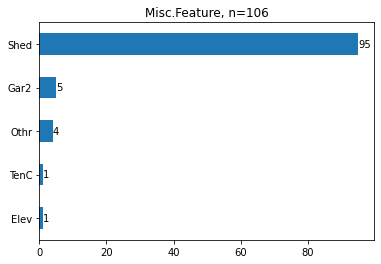

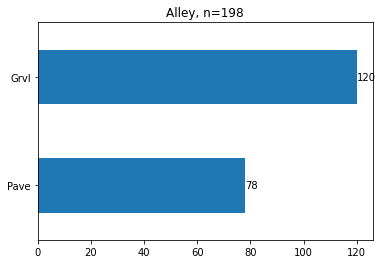

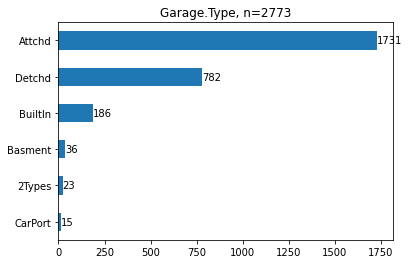

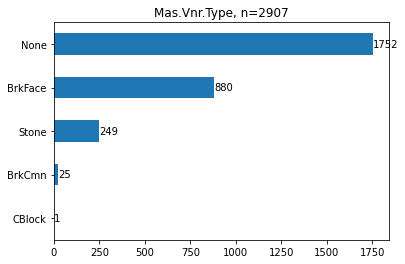

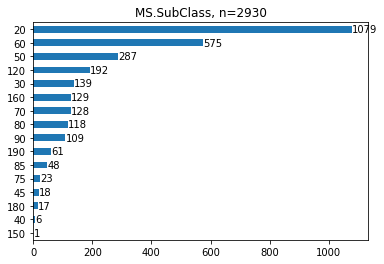

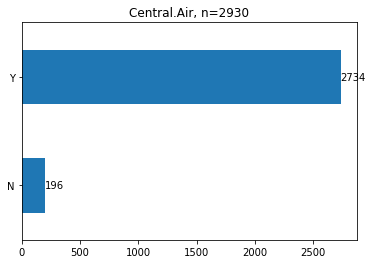

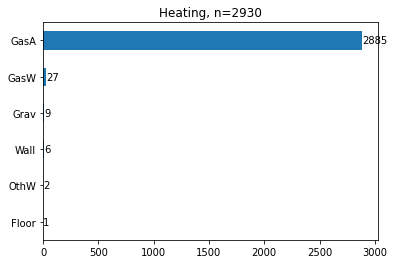

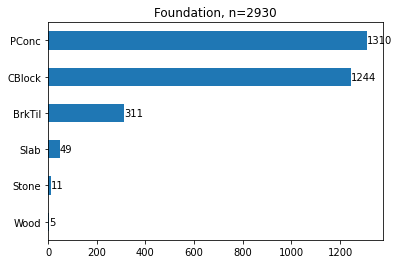

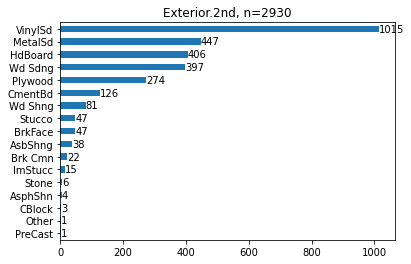

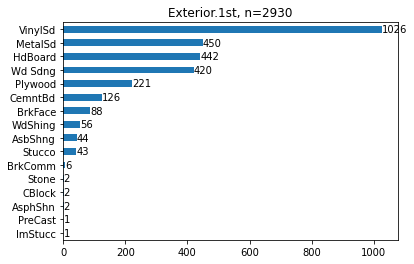

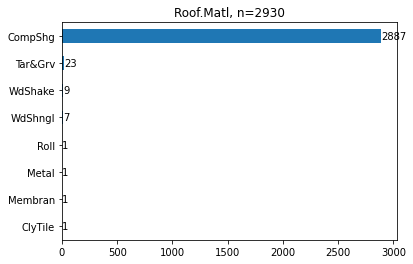

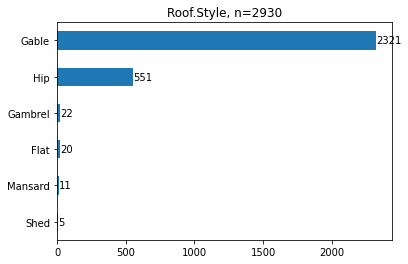

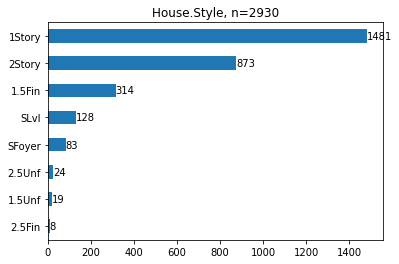

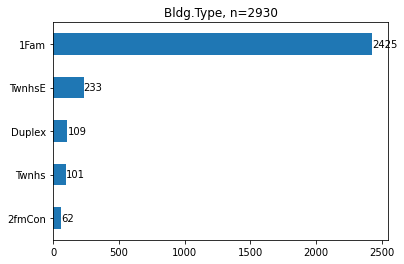

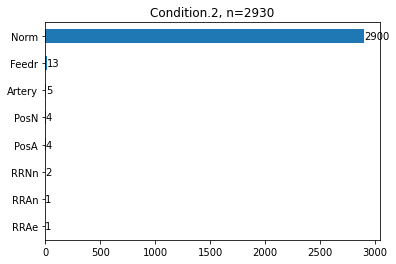

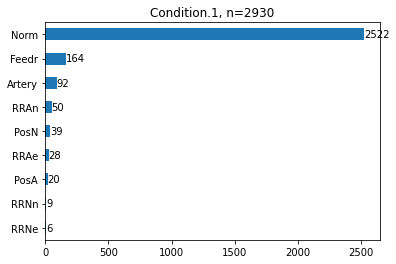

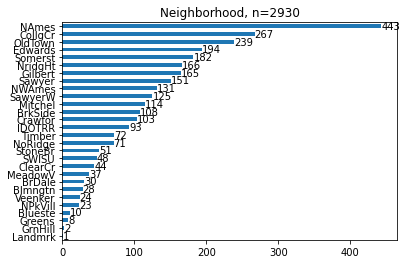

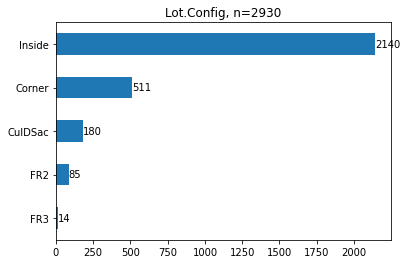

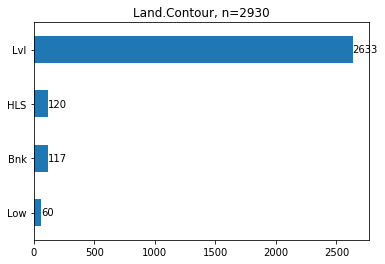

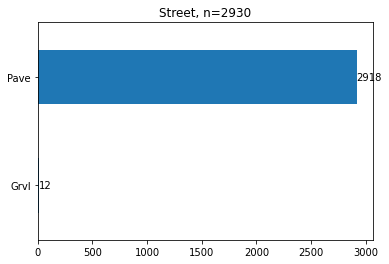

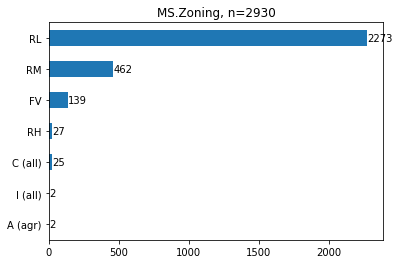

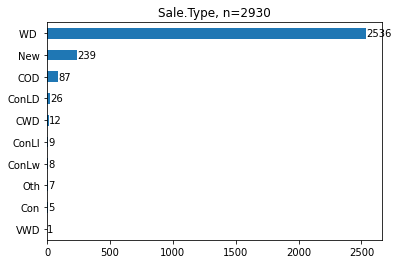

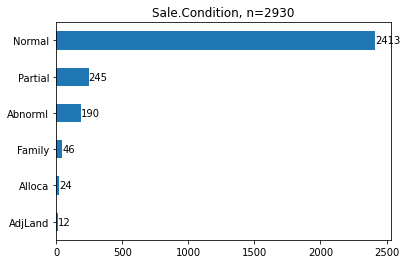

In [57]:
plot_categoricals(df, categorical_variables)

In [58]:
#Categorias A (agr), C (all), I (all) não possuem muitas observações, então podemos removê-las

selection = ~(df['MS.Zoning'].isin(['A (agr)', 'C (all)', 'I (all)']))
df = df[selection]
df['MS.Zoning'] = df['MS.Zoning'].cat.remove_unused_categories()
df['MS.Zoning'].value_counts()

RL    2273
RM     462
FV     139
RH      27
Name: MS.Zoning, dtype: int64

In [59]:
#Sale.Type e Sale.Condition possuem poucas observações, como visto no gráfico, mas não é necessário removê-las. 
#As categorias com menos entradas, entretanto, podem ser agrupadas para melhorar a visualização.

def remap_categories(
    series: pd.Series,
    old_categories: tuple[str],
    new_category: str,
) -> pd.Series:
    # Add the new category to the list of valid categories.
    series = series.cat.add_categories(new_category)

    # Set all items of the old categories as the new category.
    remapped_items = series.isin(old_categories)
    series.loc[remapped_items] = new_category

    # Clean up the list of categories, the old categories no longer exist.
    series = series.cat.remove_unused_categories()

    return series

In [60]:
df['Sale.Type'] = remap_categories(
    series=df['Sale.Type'],
    old_categories=('WD ', 'CWD', 'VWD'),
    new_category='GroupedWD',
)

df['Sale.Type'] = remap_categories(
    series=df['Sale.Type'],
    old_categories=('COD', 'ConLI', 'Con', 'ConLD', 'Oth', 'ConLw'),
    new_category='Other',
)

In [61]:
df['Sale.Type'].value_counts()

GroupedWD    2526
New           239
Other         136
Name: Sale.Type, dtype: int64

In [62]:
#Pouca representatividade de Grvl na coluna Street observada no gráfico, coluna pode ser ignorada
df = df.drop(columns='Street')

In [63]:
pd.crosstab(df['Condition.1'], df['Condition.2'])

Condition.2,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn
Condition.1,,,,,,,,
Artery,2,0,88,1,0,0,0,0
Feedr,1,3,150,0,0,1,1,2
Norm,0,0,2500,0,0,0,0,0
PosA,0,0,17,3,0,0,0,0
PosN,0,0,35,0,4,0,0,0
RRAe,0,0,28,0,0,0,0,0
RRAn,1,8,41,0,0,0,0,0
RRNe,0,0,6,0,0,0,0,0
RRNn,1,1,7,0,0,0,0,0


In [64]:
#Existem categorias menores que podem ser agrupadas em: Railroad (trilhos), Roads (estradas/avenidas) e Positive (características positivas
#ao redor do edifício)

for col in ('Condition.1', 'Condition.2'):
    df[col] = remap_categories(
        series=df[col],
        old_categories=('RRAn', 'RRAe', 'RRNn', 'RRNe'),
        new_category='Railroad',
    )
    df[col] = remap_categories(
        series=df[col],
        old_categories=('Feedr', 'Artery'),
        new_category='Roads',
    )
    df[col] = remap_categories(
        series=df[col],
        old_categories=('PosA', 'PosN'),
        new_category='Positive',
    )

In [65]:
df['Condition.1'].value_counts()

Norm        2500
Roads        249
Railroad      93
Positive      59
Name: Condition.1, dtype: int64

In [66]:
df['Condition.2'].value_counts()

Norm        2872
Roads         17
Positive       8
Railroad       4
Name: Condition.2, dtype: int64

In [67]:
pd.crosstab(df['Condition.1'], df['Condition.2'])

Condition.2,Norm,Railroad,Roads,Positive
Condition.1,,,,
Norm,2500,0,0,0
Railroad,82,0,11,0
Roads,238,4,6,1
Positive,52,0,0,7


In [68]:
#Combinando as colunas Condition.1 e Condition.2 em uma única coluna Condition

df['Condition'] = pd.Series(
    index=df.index,
    dtype=pd.CategoricalDtype(categories=(
        'Norm',
        'Railroad',
        'Roads',
        'Positive',
        'RoadsAndRailroad',
    )),
)

In [69]:
norm_items = df['Condition.1'] == 'Norm'
df['Condition'][norm_items] = 'Norm'

railroad_items = \
    (df['Condition.1'] == 'Railroad') \
    & (df['Condition.2'] == 'Norm')
df['Condition'][railroad_items] = 'Railroad'

roads_items = \
    (df['Condition.1'] == 'Roads') \
    & (df['Condition.2'] != 'Railroad')
df['Condition'][roads_items] = 'Roads'

positive_items = df['Condition.1'] == 'Positive'
df['Condition'][positive_items] = 'Positive'

roads_and_railroad_items = \
    ( \
        (df['Condition.1'] == 'Railroad') \
        & (df['Condition.2'] == 'Roads')
    ) \
    | ( \
        (df['Condition.1'] == 'Roads') \
        & (df['Condition.2'] == 'Railroad') \
    )
df['Condition'][roads_and_railroad_items] = 'RoadsAndRailroad'

df['Condition'].value_counts()

df = df.drop(columns=['Condition.1', 'Condition.2'])

             count unique   top freq
Misc.Feature   104      5  Shed   93
Alley          195      2  Grvl  119


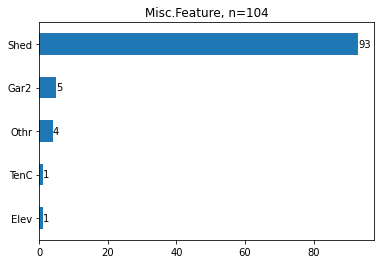

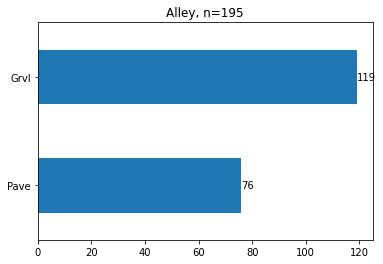

In [70]:
plot_categoricals(df, ['Misc.Feature', 'Alley'])

In [71]:
#Disparidade alta entre Shed (depósito) e outras características, pode-se criar uma coluna de HasShed

df['HasShed'] = df['Misc.Feature'] == 'Shed'
df = df.drop(columns='Misc.Feature')

In [72]:
#Muitos valores faltantes, pode-se criar uma coluna de HasAlley

df['HasAlley'] = ~df['Alley'].isna()
df = df.drop(columns='Alley')

In [73]:
#Corrigindo typos observados nos gráficos Exterior.2nd e Exterior.1st

df['Exterior.2nd'] = remap_categories(
    series=df['Exterior.2nd'],
    old_categories=('Brk Cmn', ),
    new_category='BrkComm',
)
df['Exterior.2nd'] = remap_categories(
    series=df['Exterior.2nd'],
    old_categories=('CmentBd', ),
    new_category='CemntBd',
)
df['Exterior.2nd'] = remap_categories(
    series=df['Exterior.2nd'],
    old_categories=('Wd Shng', ),
    new_category='WdShing',
)

for col in ('Exterior.1st', 'Exterior.2nd'):
    categories = df[col].cat.categories
    df[col] = df[col].cat.reorder_categories(sorted(categories))

In [74]:
mat_count = df['Exterior.1st'].value_counts()
mat_count

VinylSd    1025
HdBoard     442
MetalSd     440
Wd Sdng     411
Plywood     219
CemntBd     126
BrkFace      87
WdShing      55
Stucco       42
AsbShng      41
BrkComm       6
AsphShn       2
Stone         2
CBlock        1
ImStucc       1
PreCast       1
Name: Exterior.1st, dtype: int64

In [75]:
#Pouca representatividade de alguns materiais, pode-se criar uma coluna de Other

rare_materials = list(mat_count[mat_count < 40].index)

df['Exterior'] = remap_categories(
    series=df['Exterior.1st'],
    old_categories=rare_materials,
    new_category='Other',
)
df = df.drop(columns=['Exterior.1st', 'Exterior.2nd'])

df['Exterior'].value_counts()

VinylSd    1025
HdBoard     442
MetalSd     440
Wd Sdng     411
Plywood     219
CemntBd     126
BrkFace      87
WdShing      55
Stucco       42
AsbShng      41
Other        13
Name: Exterior, dtype: int64

In [76]:
#Possível ignorar coluna Heating, pouca representatividade no todo observada no gráfico

df = df.drop(columns='Heating')

In [77]:
#Possível ignorar coluna Roof.Matl, pouca representatividade no todo observada no gráfico

df = df.drop(columns='Roof.Matl')

In [78]:
#Alguns dos estilos de telhado possuem pouca representatividade, pode-se criar uma coluna de Other

df['Roof.Style'] = remap_categories(
    series=df['Roof.Style'],
    old_categories=[
        'Flat',
        'Gambrel',
        'Mansard',
        'Shed',
    ],
    new_category='Other',
)

df['Roof.Style'].value_counts()

Gable    2301
Hip       545
Other      55
Name: Roof.Style, dtype: int64

In [79]:
#Possível agrupar as duas últimas colunas de Mas.Vnr.Type em uma coluna Other, por baixa representatividade
#Também é possível preencher as entradas faltantes dessa categoria com "None"

df['Mas.Vnr.Type'] = remap_categories(
    series=df['Mas.Vnr.Type'],
    old_categories=[
        'BrkCmn',
        'CBlock',
    ],
    new_category='Other',
)

df['Mas.Vnr.Type'][df['Mas.Vnr.Type'].isna()] = 'None'

df['Mas.Vnr.Type'].value_counts()

None       1746
BrkFace     880
Stone       249
Other        26
Name: Mas.Vnr.Type, dtype: int64

In [80]:
#As subclasses de MS.SubClass 75, 45, 180, 40 e 150 podem ser agrupadas em uma coluna Other

df['MS.SubClass'] = remap_categories(
    series=df['MS.SubClass'],
    old_categories=[75, 45, 180, 40, 150],
    new_category='Other',
)

df['MS.SubClass'].value_counts()

20       1074
60        575
50        280
120       192
30        130
160       129
70        123
80        118
90        109
Other      65
190        58
85         48
Name: MS.SubClass, dtype: int64

In [81]:
#Categorias de Foundation com menos representatividade podem ser agrupadas numa coluna Other

df['Foundation'] = remap_categories(
    series=df['Foundation'],
    old_categories=['Slab', 'Stone', 'Wood'],
    new_category='Other',
)

df['Foundation'].value_counts()

PConc     1308
CBlock    1229
BrkTil     304
Other       60
Name: Foundation, dtype: int64

In [82]:
#Categorias de Neighborhood com menos representatividade podem ser agrupadas numa coluna Other

df['Neighborhood'] = remap_categories(
    series=df['Neighborhood'],
    old_categories=['Blueste', 'Greens', 'GrnHill', 'Landmrk'],
    new_category='Other',
)

df['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    237
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    113
BrkSide    108
Crawfor    103
Timber      72
NoRidge     71
IDOTRR      68
StoneBr     51
SWISU       47
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Other       21
Name: Neighborhood, dtype: int64

In [83]:
#Quantidade de garagens não soma no gráfico; devem haver casas sem garagem, então podemos criar uma categoria extra
#Preciso printar os valores!!!!!!!

df['Garage.Type'] = df['Garage.Type'].cat.add_categories(['NoGarage'])
df['Garage.Type'][df['Garage.Type'].isna()] = 'NoGarage'
df['Garage.Type'].value_counts()

Attchd      1729
Detchd       767
BuiltIn      186
NoGarage     147
Basment       35
2Types        23
CarPort       14
Name: Garage.Type, dtype: int64

In [84]:
#Visualizando todas as novas variáveis categóricas

all_categorical = df.select_dtypes('category').columns

new_categorical_variables = [ \
    col for col in all_categorical \
    if not col in ordinal_variables \
]

               count unique        top  freq
MS.SubClass     2901     12         20  1074
MS.Zoning       2901      4         RL  2273
Land.Contour    2901      4        Lvl  2612
Lot.Config      2901      5     Inside  2119
Neighborhood    2901     25      NAmes   443
Bldg.Type       2901      5       1Fam  2399
House.Style     2901      8     1Story  1467
Roof.Style      2901      3      Gable  2301
Mas.Vnr.Type    2901      4       None  1746
Foundation      2901      4      PConc  1308
Central.Air     2901      2          Y  2723
Garage.Type     2901      7     Attchd  1729
Sale.Type       2901      3  GroupedWD  2526
Sale.Condition  2901      6     Normal  2397
Condition       2901      5       Norm  2500
Exterior        2901     11    VinylSd  1025


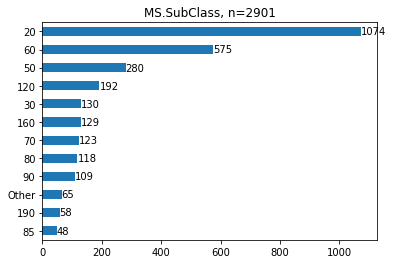

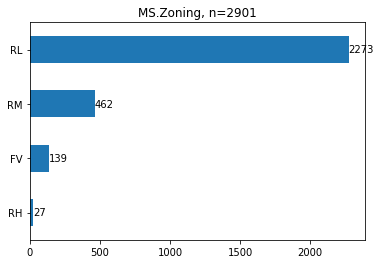

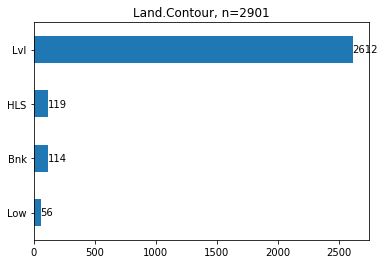

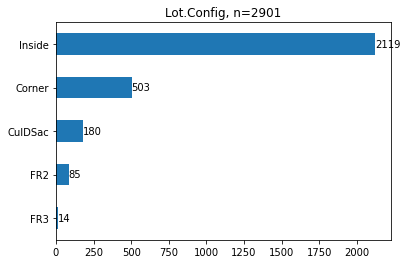

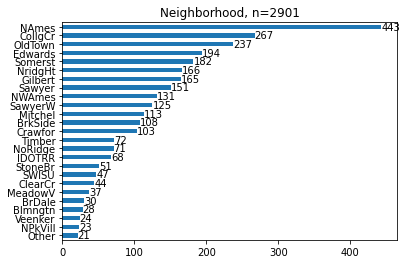

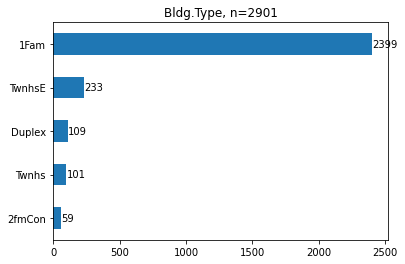

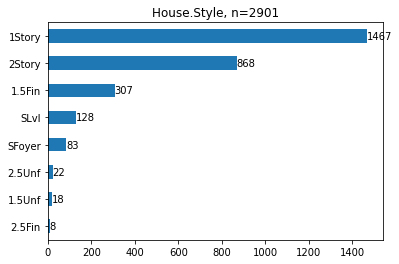

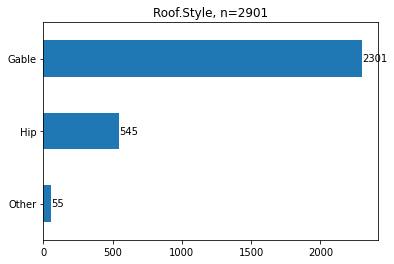

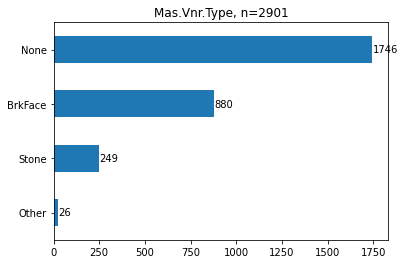

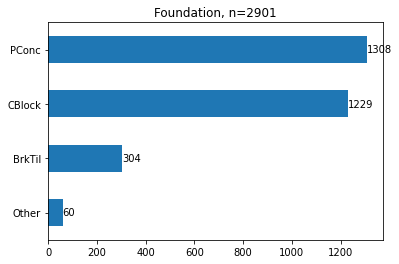

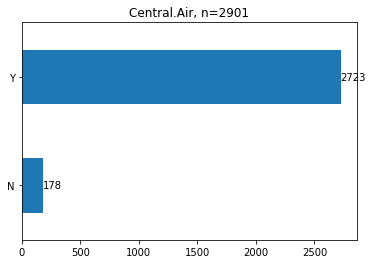

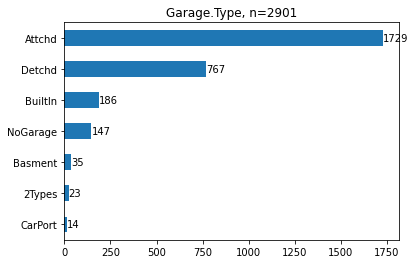

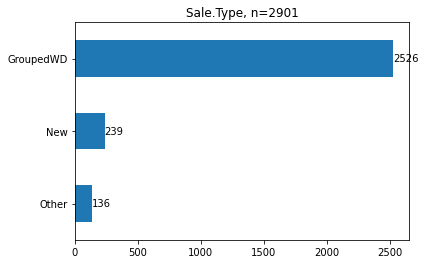

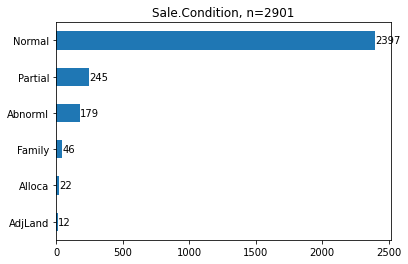

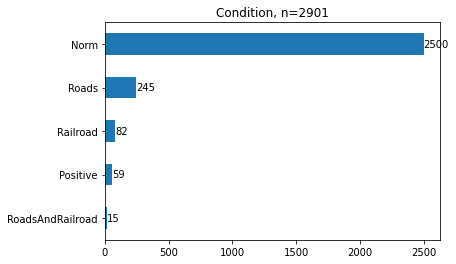

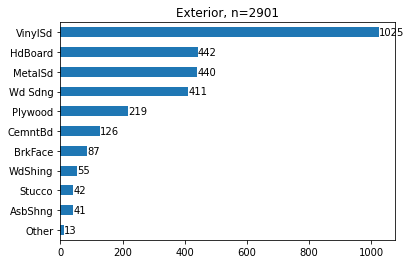

In [85]:
plot_categoricals(df, new_categorical_variables)

               count unique     top  freq
Pool.QC           13      4      Ex     4
Fence            569      4   MnPrv   328
Fireplace.Qu    1506      5      Gd   742
Garage.Cond     2752      5      TA  2652
Garage.Qual     2752      5      TA  2601
Garage.Finish   2752      3     Unf  1216
Bsmt.Exposure   2822      4      No  1887
BsmtFin.Type.2  2824      6     Unf  2474
Bsmt.Cond       2825      5      TA  2597
BsmtFin.Type.1  2825      6     GLQ   858
Bsmt.Qual       2825      4      TA  1263
Electrical      2900      5   SBrkr  2664
Exter.Cond      2901      5      TA  2531
Exter.Qual      2901      4      TA  1779
Heating.QC      2901      5      Ex  1489
Kitchen.Qual    2901      5      TA  1471
Functional      2901      8     Typ  2706
Overall.Cond    2901      9       5  1649
Overall.Qual    2901     10       5   820
Land.Slope      2901      3     Gtl  2764
Utilities       2901      3  AllPub  2899
Paved.Drive     2901      3       Y  2644
Lot.Shape       2901      4     Re

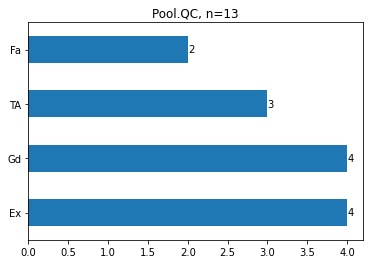

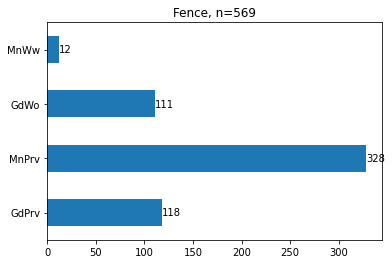

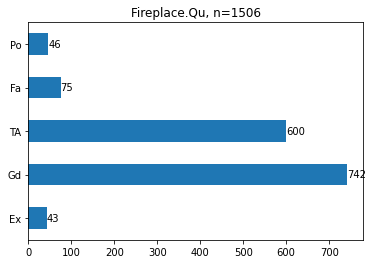

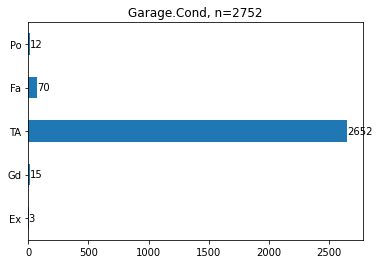

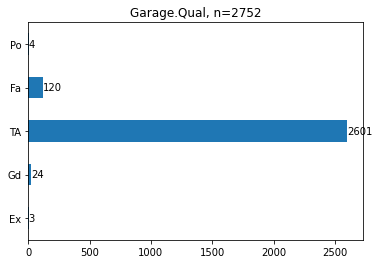

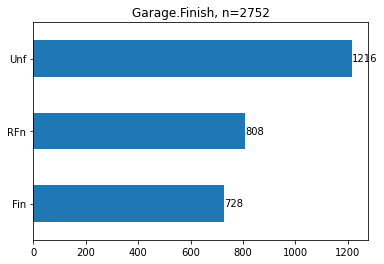

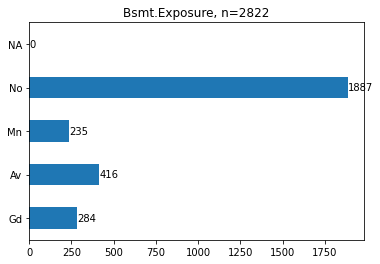

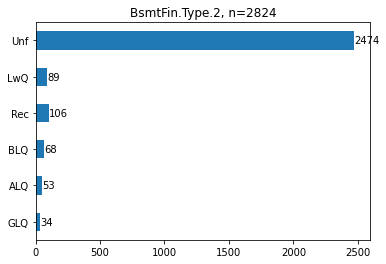

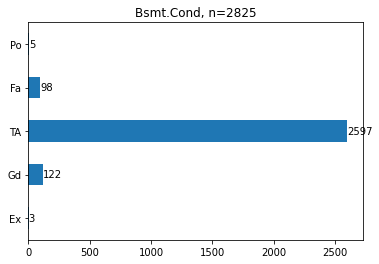

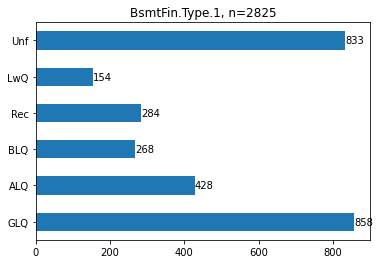

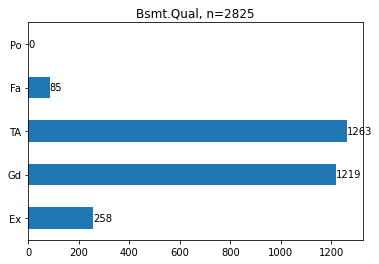

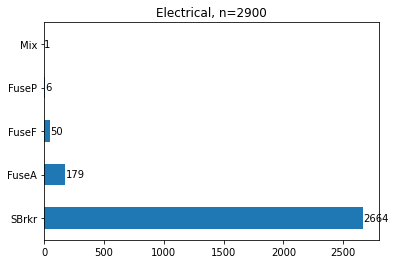

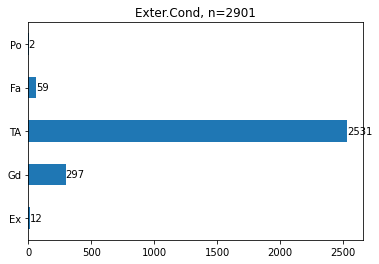

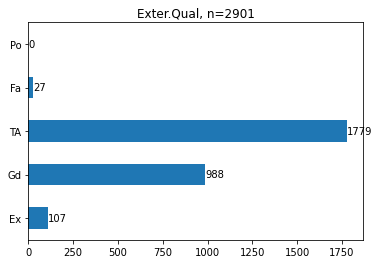

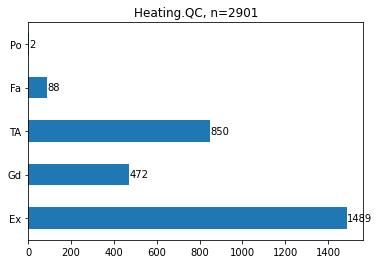

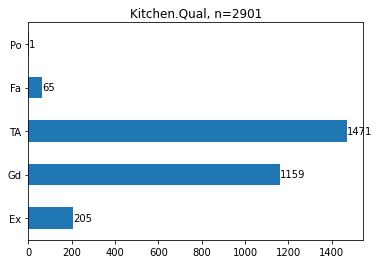

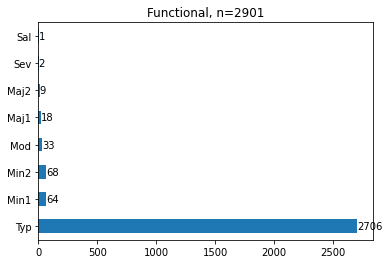

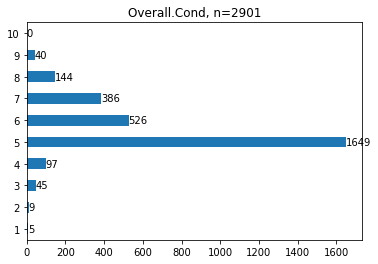

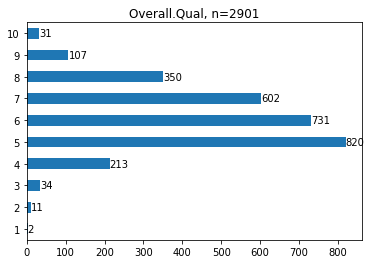

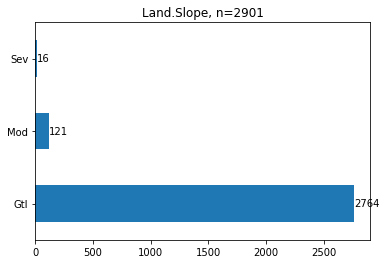

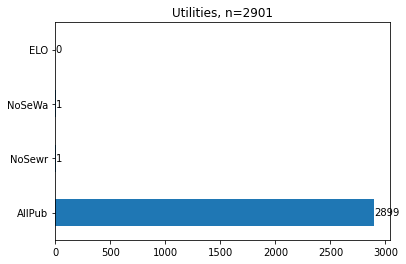

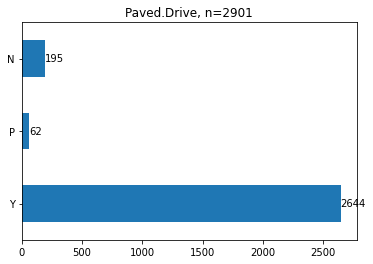

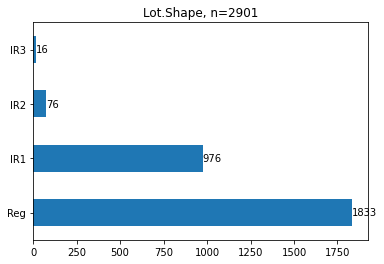

In [86]:
plot_categoricals(df, ordinal_variables, sorted=False)

In [87]:
#Utilities tem uma representatividade muito baixa no todo, então pode ser ignorada
#Pool.QC traz poucas informações, também pode ser ignorada

df = df.drop(columns='Utilities')
df = df.drop(columns='Pool.QC')

In [88]:
#Fence tem muitos valores faltantes, que podem ser interpretados como casas sem cerca

old_categories = list(df['Fence'].cat.categories)
new_categories = old_categories + ['NoFence']
df['Fence'] = df['Fence'].cat.set_categories(new_categories)
df['Fence'][df['Fence'].isna()] = 'NoFence'
df['Fence'].value_counts().sort_index()

GdPrv       118
MnPrv       328
GdWo        111
MnWw         12
NoFence    2332
Name: Fence, dtype: int64

In [89]:
#Coluna Fireplace.Qu pode ser ignorada, pois já existe uma com o número de lareiras (Fireplaces) e essa traz poucas informações, uma vez
#que a maioria das lareiras dessa coluna tem qualidade boa ou normal.

df = df.drop(columns='Fireplace.Qu')


In [90]:
#Colunas Garage.Cond e Garage.Qual tem pouca representatividade e podem ser ignoradas
#Pode-se transformar a coluna Garage.Finish em uma nominal, criando uma categoria extra para casas sem garagem

df = df.drop(columns=['Garage.Cond', 'Garage.Qual'])
df['Garage.Finish'] = df['Garage.Finish'] \
    .cat \
    .as_unordered() \
    .cat \
    .add_categories(['NoGarage'])
df['Garage.Finish'][df['Garage.Finish'].isna()] = 'NoGarage'
df['Garage.Finish'].value_counts()
df['Garage.Finish'].dtype
df['Garage.Finish'].cat.ordered

False

In [91]:
#Só há um valor faltante na coluna Electrical, então podemos substituí-lo pelo mais predominante.

df['Electrical'].isna().value_counts()
df['Electrical'][df['Electrical'].isna()] = 'SBrkr'
ordinal_columns = [col for col in df.select_dtypes('category') if df[col].cat.ordered]

In [92]:
#Existem valores faltantes para Bsmt.Exposure e a categoria NA está vazia. A preenchemos com os valores faltantes e transformamos a coluna 
#em nominal.

df['Bsmt.Exposure'][df['Bsmt.Exposure'].isna()] = 'NA'
df['Bsmt.Exposure'] = df['Bsmt.Exposure'] \
    .cat \
    .as_unordered() \
    .cat \
    .remove_unused_categories()

for col in ('Bsmt.Qual', 'Bsmt.Cond', 'BsmtFin.Type.1', 'BsmtFin.Type.2'):
    df[col] = df[col].cat.add_categories(['NA'])
    df[col][df[col].isna()] = 'NA'
    df[col] = df[col] \
        .cat \
        .as_unordered() \
        .cat \
        .remove_unused_categories()
    

In [93]:
#Existem entradas com pouca relevância em comparação com outras categorias. Nesse caso, elas podem ser passadas para outras categorias,
#simplificando o dataset

df['Bsmt.Cond'][df['Bsmt.Cond'] == 'Po'] = 'Fa'
df['Bsmt.Cond'][df['Bsmt.Cond'] == 'Ex'] = 'Gd'
df['Bsmt.Cond'] = df['Bsmt.Cond'].cat.remove_unused_categories()

df['Bsmt.Cond'].value_counts()

TA    2597
Gd     125
Fa     103
NA      76
Name: Bsmt.Cond, dtype: int64

In [94]:
#Garage.Qual e Garage.Cond podem ser simplificadas, pois possuem poucas entradas com valores diferentes de TA e se referem à qualidade
#em geral da garagem

df['Garage_Quality'] = data['Garage.Qual'].str.cat(data['Garage.Cond'], sep='_')
df['Garage_Quality'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2901 entries, 0 to 2929
Series name: Garage_Quality
Non-Null Count  Dtype 
--------------  ----- 
2752 non-null   object
dtypes: object(1)
memory usage: 45.3+ KB


In [95]:
#Exter.Qual e Exter.Cond podem ser simplificadas, pois possuem poucas entradas com valores diferentes de TA e se referem à qualidade
#em geral da garagem

df['Exterior_Quality'] = df['Exter.Qual'].str.cat(df['Exter.Cond'], sep='_')
df['Exterior_Quality'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2901 entries, 0 to 2929
Series name: Exterior_Quality
Non-Null Count  Dtype 
--------------  ----- 
2901 non-null   object
dtypes: object(1)
memory usage: 45.3+ KB


Análise das variáveis numéricas

                  count           mean           std      min        25%  \
Lot.Frontage     2414.0      69.214996     23.393935     21.0      58.00   
Garage.Yr.Blt    2752.0    1978.375363     25.298920   1900.0    1961.00   
Mas.Vnr.Area     2878.0     102.923558    179.719200      0.0       0.00   
Bsmt.Half.Bath   2899.0       0.061400      0.245786      0.0       0.00   
Bsmt.Full.Bath   2899.0       0.434978      0.525569      0.0       0.00   
Garage.Cars      2900.0       1.775517      0.755082      0.0       1.00   
Garage.Area      2900.0     474.897931    213.300899      0.0     326.75   
BsmtFin.SF.1     2900.0     445.674828    455.827457      0.0       0.00   
BsmtFin.SF.2     2900.0      50.219655    169.939026      0.0       0.00   
Bsmt.Unf.SF      2900.0     560.312759    440.296965      0.0     220.00   
Total.Bsmt.SF    2900.0    1056.207241    439.093487      0.0     796.00   
Wood.Deck.SF     2901.0      94.561186    126.678290      0.0       0.00   
Screen.Porch

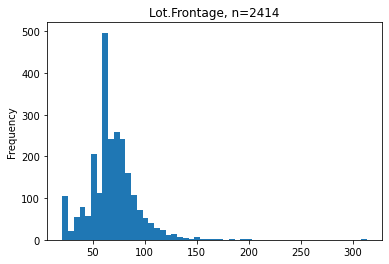

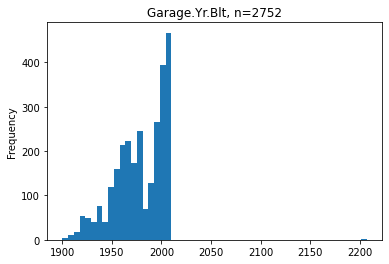

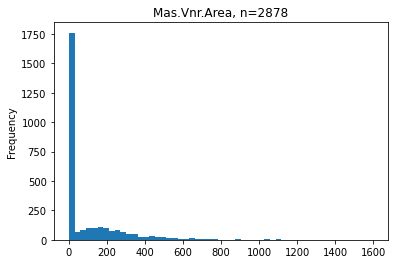

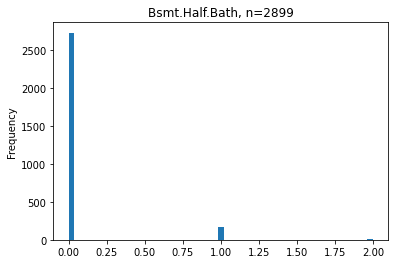

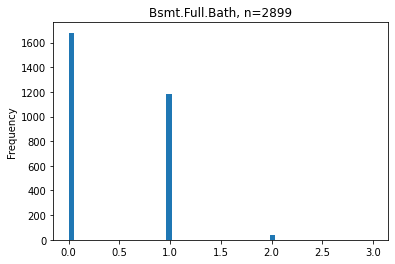

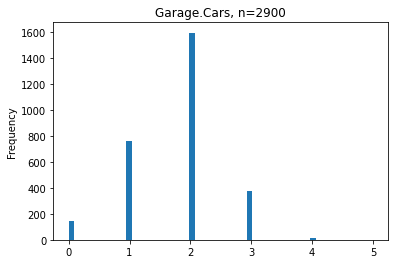

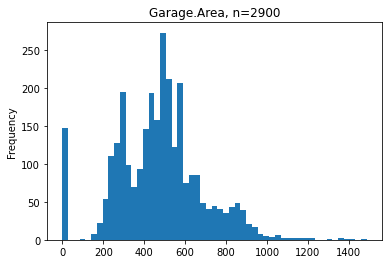

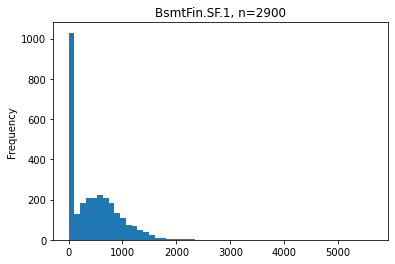

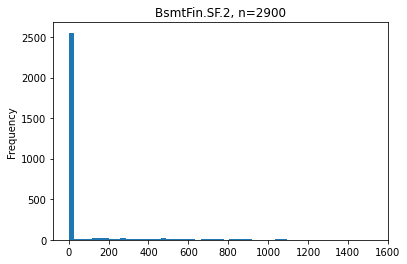

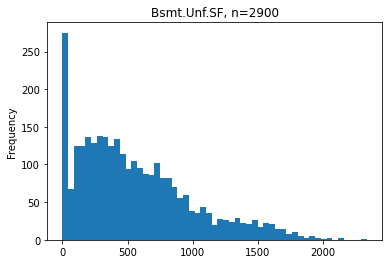

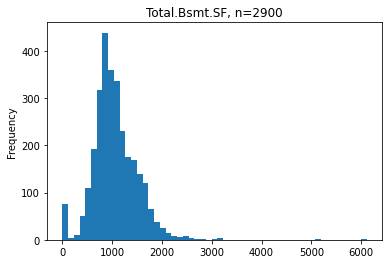

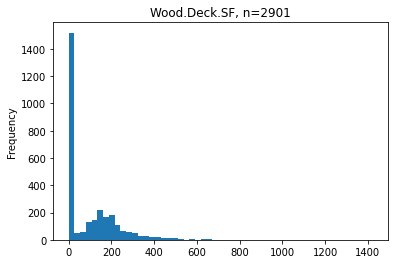

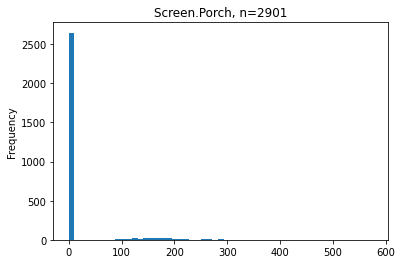

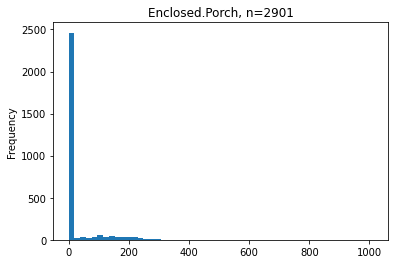

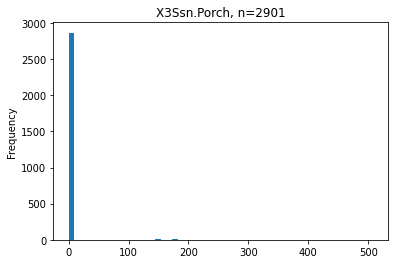

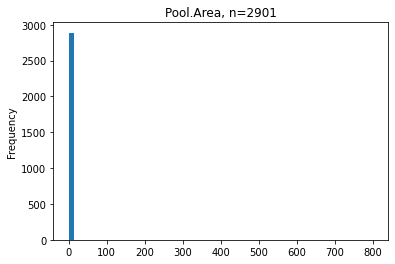

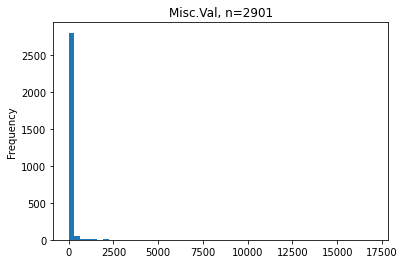

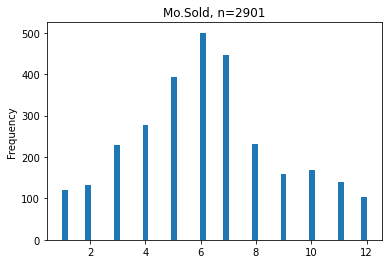

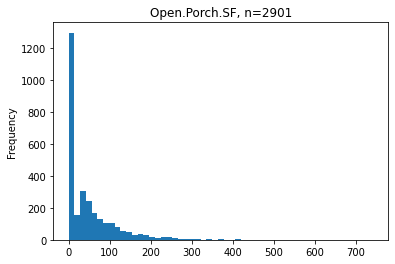

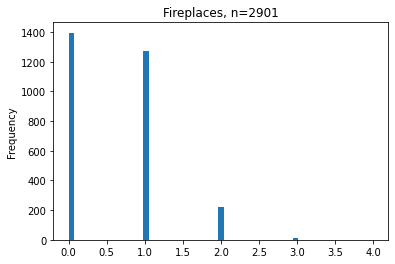

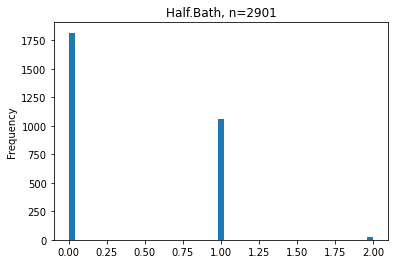

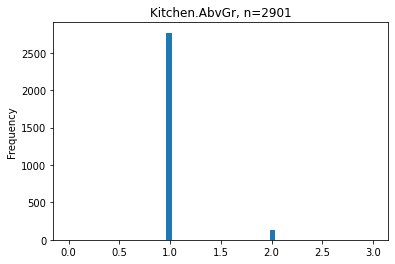

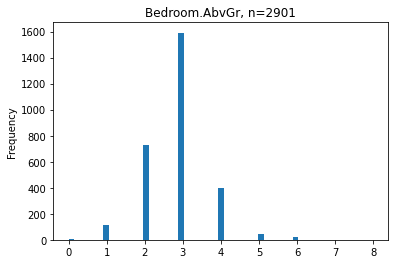

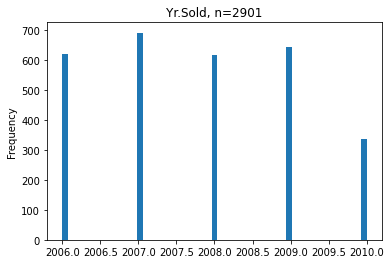

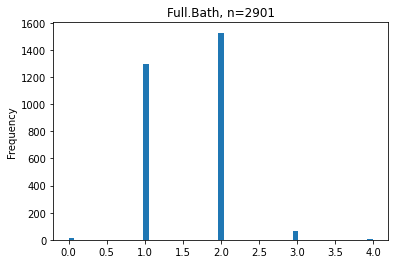

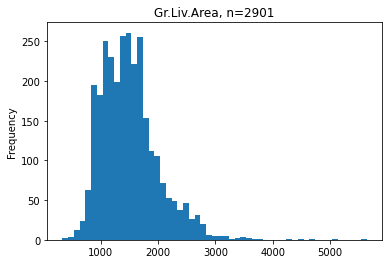

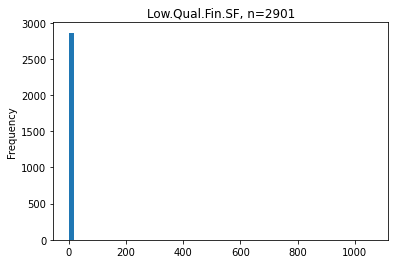

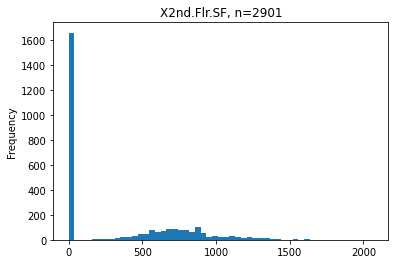

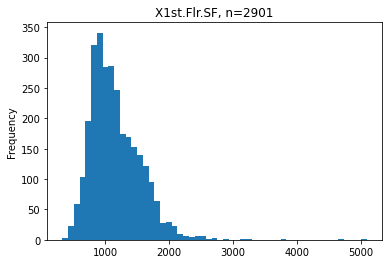

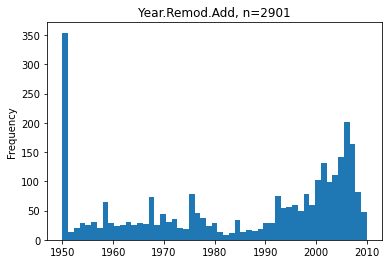

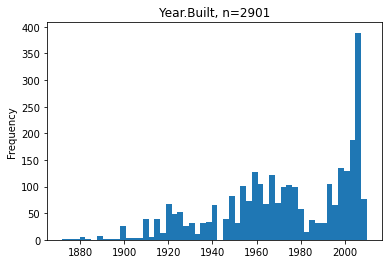

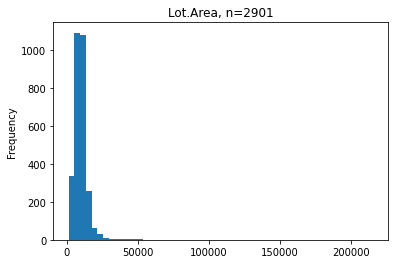

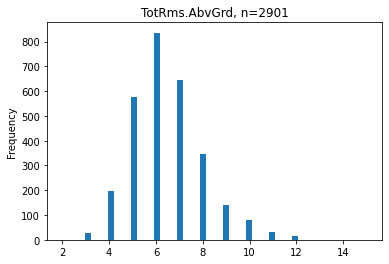

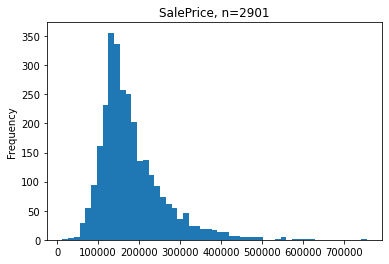

In [96]:
#plotando informações em gráficos

def plot_numericals(df, cols):
    summary = df[cols] \
        .describe() \
        .transpose() \
        .sort_values(by='count')

    print(summary)

    n = df.shape[0]
    b = int(np.sqrt(n))
    for k, (col, val) in enumerate(summary['count'].items()):
        plt.figure()
        df[col].plot.hist(bins=b)
        plt.title(f'{col}, n={int(val)}')
        plt.show()

plot_numericals(df, df.select_dtypes('number').columns)

In [97]:
#Transformando o preço de venda em log de base 10, como solicitado no enunciado da atividade

df['SalePrice'] = df['SalePrice'].apply(np.log10)
df['SalePrice'].describe()

count    2901.000000
mean        5.224394
std         0.172507
min         4.106837
25%         5.113943
50%         5.208173
75%         5.330414
max         5.877947
Name: SalePrice, dtype: float64

In [98]:
df['Lot.Frontage'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2901 entries, 0 to 2929
Series name: Lot.Frontage
Non-Null Count  Dtype  
--------------  -----  
2414 non-null   float64
dtypes: float64(1)
memory usage: 45.3 KB


In [99]:
#Verifica correlação com a variável Lot.Area e prevê valores faltantes com base nessa correlação
aux_data = df[['Lot.Frontage', 'Lot.Area']].copy()
aux_data['Sqrt.Lot.Area'] = aux_data['Lot.Area'].apply(np.sqrt)

aux_data[['Lot.Frontage', 'Sqrt.Lot.Area']].corr()

df['Lot.Frontage'] = df['Lot.Frontage'].fillna(df['Lot.Frontage'].median())

In [100]:
df['Lot.Frontage'].info()
df['Lot.Area'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2901 entries, 0 to 2929
Series name: Lot.Frontage
Non-Null Count  Dtype  
--------------  -----  
2901 non-null   float64
dtypes: float64(1)
memory usage: 45.3 KB
<class 'pandas.core.series.Series'>
Int64Index: 2901 entries, 0 to 2929
Series name: Lot.Area
Non-Null Count  Dtype  
--------------  -----  
2901 non-null   float64
dtypes: float64(1)
memory usage: 45.3 KB


In [101]:
#Existe um valor para a garagem que não condiz com os anos das informações do dataset. Nesse caso, podemos criar uma coluna para a idade
#da garagem e substituir o valor incorreto por 0. Comparando com a coluna Garage.Area, se a área for zero, atribui-se 0 ao ano da garagem.
#Para os valores faltantes da coluna de garagem, pode ser colocada a mediana da idade, causando o mínimo de impacto ao dataset

garage_age = df['Yr.Sold'] - df['Garage.Yr.Blt']

df[garage_age < 0.0].transpose()
garage_age[garage_age < 0.0] = 0.0

df = df.drop(columns='Garage.Yr.Blt')
df['Garage.Age'] = garage_age

df.loc[df['Garage.Area'] == 0, 'Garage.Age'] = 0

df['Garage.Age'] = df['Garage.Age'].fillna(df['Garage.Age'].median())

df['Garage.Age'].info()


<class 'pandas.core.series.Series'>
Int64Index: 2901 entries, 0 to 2929
Series name: Garage.Age
Non-Null Count  Dtype  
--------------  -----  
2901 non-null   float64
dtypes: float64(1)
memory usage: 45.3 KB


In [102]:
#Em Year.Built e Year.Remod.Add o mesmo problema existe, e a solução utilizada é a mesma: transformar os valores duvidosos em zero, criar
#novas colunas e preencher valores faltantes com a média.

remod_age = df['Yr.Sold'] - df['Year.Remod.Add']
df[remod_age < 0.0].transpose()
remod_age[remod_age < 0.0] = 0.0

house_age = df['Yr.Sold'] - df['Year.Built']
df[house_age < 0.0].transpose()
house_age[house_age < 0.0] = 0.0

df = df.drop(columns=['Year.Remod.Add', 'Year.Built'])
df['Remod.Age'] = remod_age
df['House.Age'] = house_age

In [103]:
#Para Mas.Vnr.Type, podemos colocar os valores faltantes como 0, pois correspondem à ausência de alvenaria

df['Mas.Vnr.Area'].info()
df['Mas.Vnr.Type'][df['Mas.Vnr.Area'].isna()].value_counts()
df.loc[df['Mas.Vnr.Area'].isna(), 'Mas.Vnr.Area'] = 0.0

<class 'pandas.core.series.Series'>
Int64Index: 2901 entries, 0 to 2929
Series name: Mas.Vnr.Area
Non-Null Count  Dtype  
--------------  -----  
2878 non-null   float64
dtypes: float64(1)
memory usage: 45.3 KB


In [104]:
#Em Pool.Area, os valores iguais a 0 podem significar que não há piscina, e os demais, que há piscina. Podemos deixar o dataset como está.

df['Pool.Area'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2901 entries, 0 to 2929
Series name: Pool.Area
Non-Null Count  Dtype  
--------------  -----  
2901 non-null   float64
dtypes: float64(1)
memory usage: 45.3 KB


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2901 entries, 0 to 2929
Data columns (total 72 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MS.SubClass       2901 non-null   category
 1   MS.Zoning         2901 non-null   category
 2   Lot.Frontage      2901 non-null   float64 
 3   Lot.Area          2901 non-null   float64 
 4   Lot.Shape         2901 non-null   category
 5   Land.Contour      2901 non-null   category
 6   Lot.Config        2901 non-null   category
 7   Land.Slope        2901 non-null   category
 8   Neighborhood      2901 non-null   category
 9   Bldg.Type         2901 non-null   category
 10  House.Style       2901 non-null   category
 11  Overall.Qual      2901 non-null   category
 12  Overall.Cond      2901 non-null   category
 13  Roof.Style        2901 non-null   category
 14  Mas.Vnr.Type      2901 non-null   category
 15  Mas.Vnr.Area      2901 non-null   float64 
 16  Exter.Qual        2901 n

In [106]:
#Após limpar o máximo possível do dataset, é possível eliminar as linhas com valores faltantes restantes

df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 2929
Data columns (total 72 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MS.SubClass       2750 non-null   category
 1   MS.Zoning         2750 non-null   category
 2   Lot.Frontage      2750 non-null   float64 
 3   Lot.Area          2750 non-null   float64 
 4   Lot.Shape         2750 non-null   category
 5   Land.Contour      2750 non-null   category
 6   Lot.Config        2750 non-null   category
 7   Land.Slope        2750 non-null   category
 8   Neighborhood      2750 non-null   category
 9   Bldg.Type         2750 non-null   category
 10  House.Style       2750 non-null   category
 11  Overall.Qual      2750 non-null   category
 12  Overall.Cond      2750 non-null   category
 13  Roof.Style        2750 non-null   category
 14  Mas.Vnr.Type      2750 non-null   category
 15  Mas.Vnr.Area      2750 non-null   float64 
 16  Exter.Qual        2750 n

In [107]:
#Salvando o dataset com análise exploratória e feature engineering

df.to_csv('data/ames_reformado.csv', index=False)  